In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

excel_name = '附件1 监测点A空气质量预报基础数据.xlsx'#附件1 监测点A空气质量预报基础数据.xlsx
na_values = '—'

def cp(value, value_name):
    print('==============%s=============='%value_name)
    print(value)    
    print('==============%s=============='%value_name)

data3 = pd.read_excel(excel_name, sheet_name=2,na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6


In [175]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-12 00:00:00'
time_list = pd.date_range(start_time, end_time, freq='D')
data3 = data3.iloc[:-3,:]
print('应有天数',len(time_list))
print('实际天数', len(data3))
data3

应有天数 819
实际天数 819


,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6
3,2019-04-19,监测点A,5.0,50.0,23.0,15.0,71.0,0.6
4,2019-04-20,监测点A,6.0,68.0,33.0,26.0,32.0,0.7
...,...,...,...,...,...,...,...,...
814,2021-07-08,监测点A,5.0,15.0,18.0,3.0,64.0,0.4
815,2021-07-09,监测点A,7.0,17.0,28.0,12.0,146.0,0.4
816,2021-07-10,监测点A,6.0,13.0,20.0,5.0,81.0,0.4
817,2021-07-11,监测点A,6.0,11.0,20.0,3.0,63.0,0.3


# 预处理

In [176]:
data3.isnull().sum()

监测日期                       0
地点                         0
SO2监测浓度(μg/m³)             4
NO2监测浓度(μg/m³)             6
PM10监测浓度(μg/m³)           11
PM2.5监测浓度(μg/m³)           5
O3最大八小时滑动平均监测浓度(μg/m³)     7
CO监测浓度(mg/m³)              6
dtype: int64

In [177]:
data_temp = data3.iloc[:,2:].interpolate()
data_temp.isnull().sum()

SO2监测浓度(μg/m³)            0
NO2监测浓度(μg/m³)            0
PM10监测浓度(μg/m³)           0
PM2.5监测浓度(μg/m³)          0
O3最大八小时滑动平均监测浓度(μg/m³)    0
CO监测浓度(mg/m³)             0
dtype: int64

In [178]:
data_temp.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,7.008547,32.875458,44.073871,24.219170,98.542125,0.715568
std,3.065990,18.737483,23.198945,22.217843,51.869257,0.206167
min,1.000000,4.000000,5.000000,2.000000,2.000000,0.300000
25%,5.000000,20.000000,27.000000,11.000000,61.000000,0.600000
50%,6.000000,29.000000,38.000000,21.000000,87.000000,0.700000
75%,9.000000,41.500000,56.000000,32.500000,128.000000,0.800000
max,20.000000,132.000000,143.000000,465.000000,296.000000,1.500000


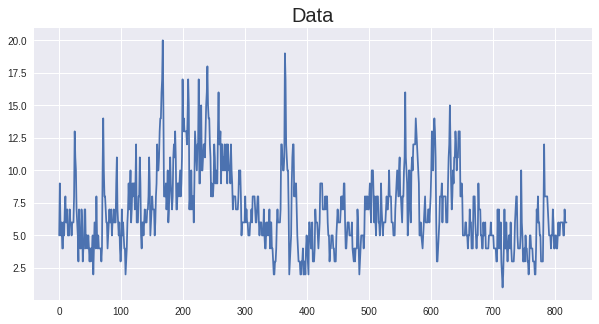

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

predict_dim = 3 
time_step = 10

target = data_temp.iloc[:,0].values
#plot
plt.figure(figsize=(10,5))
plt.plot(target)
plt.title("Data",fontsize='20') #添加标题
plt.show()
print('\n')


# 归一化

In [180]:
#minmaxscaler
mm_x= MinMaxScaler()
data = mm_x.fit_transform(data_temp)
data[:2]

array([[0.21052632, 0.40625   , 0.22463768, 0.06263499, 0.34353741,
        0.41666667],
       [0.42105263, 0.4609375 , 0.44927536, 0.11015119, 0.69387755,
        0.66666667]])

In [181]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '6'
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
tensorflow_version = tf.__version__
gpu_available = tf.test.is_gpu_available()
print("tensorflow_version", tensorflow_version, "GPU available", gpu_available)

tensorflow_version 2.2.0 GPU available True


2021-10-17 20:18:45.739000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:40:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-17 20:18:45.739380: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-17 20:18:45.739452: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-17 20:18:45.739512: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-10-17 20:18:45.739563: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-10-17 20:18:45.739619: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolv

# polution-1-SO2

In [182]:
target_id = 0

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)


In [183]:
x_last = data[-time_step:]
x_last = np.reshape(x_last, (1,x_last.shape[-2],x_last.shape[-1]))
x_last.shape

(1, 10, 6)

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_61 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.2442 - val_loss: 0.1567
Epoch 2/50
6/6 - 0s - loss: 0.2014 - val_loss: 0.1333
Epoch 3/50
6/6 - 0s - loss: 0.1480 - val_loss: 0.1173
Epoch 4/50
6/6 - 0s - loss: 0.1370 - val_loss: 0.1133
Epoch 5/50
6/6 - 0s - loss: 0.1217 - v

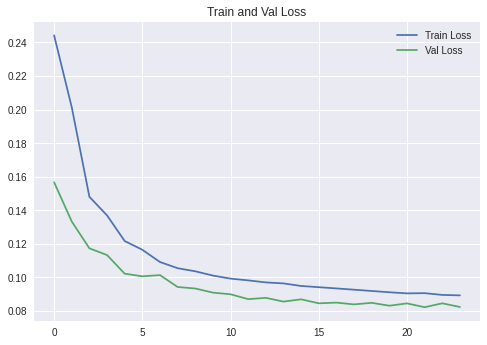

In [184]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


In [185]:
myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_1_pred = y_test_predict.copy()
polution_1_test = y_test.copy()
polution_1_pred, polution_1_test

(array([[0.29639527, 0.2882939 , 0.2587045 ]], dtype=float32),
 array([[0.26315789, 0.26315789, 0.26315789]]))

In [186]:
polution_1_last = myModel.predict(x_last)
polution_1_last

array([[0.2765041 , 0.2242828 , 0.22520338]], dtype=float32)

# polution-2

In [187]:
target_id = 1

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)


Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_63 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 2s - loss: 0.1666 - val_loss: 0.0896
Epoch 2/50
6/6 - 0s - loss: 0.1305 - val_loss: 0.0934
Epoch 3/50
6/6 - 0s - loss: 0.1182 - val_loss: 0.0786
Epoch 4/50
6/6 - 0s - loss: 0.1096 - val_loss: 0.0735
Epoch 5/50
6/6 - 0s - loss: 0.1019 - v

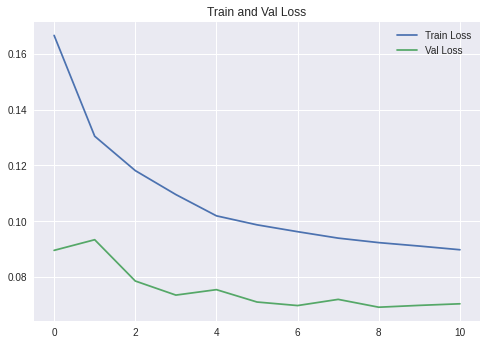

In [188]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


In [189]:
myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_2_pred = y_test_predict.copy()
polution_2_test = y_test.copy()
polution_2_pred, polution_2_test

(array([[0.10098641, 0.12540144, 0.1103808 ]], dtype=float32),
 array([[0.0703125, 0.0546875, 0.0546875]]))

In [190]:
polution_2_last = myModel.predict(x_last)
polution_2_last

array([[0.06188366, 0.08634532, 0.071267  ]], dtype=float32)

# polution-3

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)
Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.2382 - val_loss: 0.1374
Epoch 2/50
6/6 - 0s - loss: 0.2037 - val_loss: 0.1373
Epoch 3/50
6/

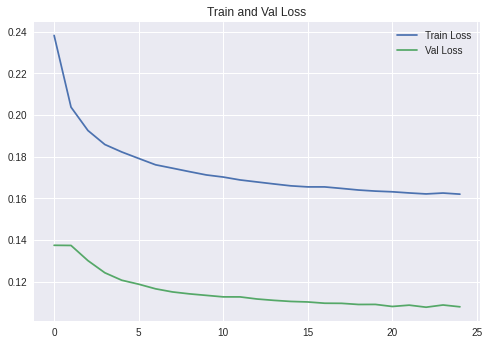

(array([[0.        , 0.13894957, 0.17198749]], dtype=float32),
 array([[0.10869565, 0.10869565, 0.08695652]]))

In [191]:
target_id = 2

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_3_pred = y_test_predict.copy()
polution_3_test = y_test.copy()
polution_3_pred, polution_3_test

In [192]:
polution_3_last = myModel.predict(x_last)
polution_3_last

array([[0.        , 0.13693263, 0.15437599]], dtype=float32)

# polution-4

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 1s - loss: 0.1211 - val_loss: 0.0265
Epoch 2/50
6/6 - 0s - loss: 0.0508 - val_loss: 0.0239
Epoch 3/50
6/

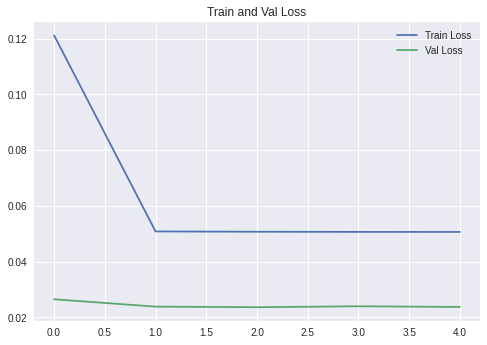

(array([[0., 0., 0.]], dtype=float32),
 array([[0.00647948, 0.00215983, 0.00647948]]))

In [193]:
target_id = 3

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_4_pred = y_test_predict.copy()
polution_4_test = y_test.copy()
polution_4_pred, polution_4_test

In [194]:
polution_4_last = myModel.predict(x_last)
polution_4_last

array([[0., 0., 0.]], dtype=float32)

# polution-5

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)
Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_69 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.2672 - val_loss: 0.1905
Epoch 2/50
6/6 - 0s - loss: 0.2172 - val_loss: 0.1927
Epoch 3/50
6/

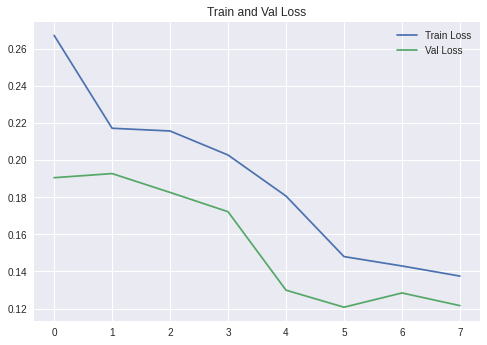

(array([[0.25299317, 0.22774108, 0.25623396]], dtype=float32),
 array([[0.26870748, 0.20748299, 0.26870748]]))

In [195]:
target_id = 4

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_5_pred = y_test_predict.copy()
polution_5_test = y_test.copy()
polution_5_pred, polution_5_test

In [196]:
polution_5_last = myModel.predict(x_last)
polution_5_last

array([[0.2588913 , 0.16754492, 0.18216069]], dtype=float32)

# polution-6

x.shape, y.shape (807, 10, 6) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 6) (1, 10, 6) (806, 3) (1, 3)
Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 10, 6)]           0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 60)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_71 (Dense)             (None, 3)                 195       
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 2s - loss: 0.2399 - val_loss: 0.1622
Epoch 2/50
6/6 - 0s - loss: 0.2180 - val_loss: 0.1330
Epoch 3/50
6/

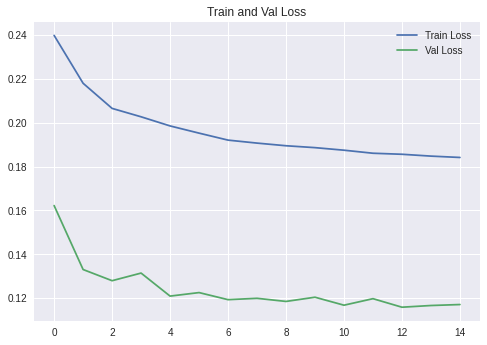

(array([[0.14054713, 0.08429607, 0.        ]], dtype=float32),
 array([[0.08333333, 0.        , 0.08333333]]))

In [197]:
target_id = 5

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_6_pred = y_test_predict.copy()
polution_6_test = y_test.copy()
polution_6_pred, polution_6_test

In [198]:
polution_6_last = myModel.predict(x_last)
polution_6_last

array([[0.12340283, 0.0470346 , 0.        ]], dtype=float32)

# 结合+返归一化

In [199]:
all_test = np.array([polution_1_test,polution_2_test,polution_3_test,
                     polution_4_test,polution_5_test,polution_6_test ])
all_test = all_test[:,0,:].T
all_test = mm_x.inverse_transform(all_test)
all_test

array([[ 6. , 13. , 20. ,  5. , 81. ,  0.4],
       [ 6. , 11. , 20. ,  3. , 63. ,  0.3],
       [ 6. , 11. , 17. ,  5. , 81. ,  0.4]])

In [200]:
all_pred = np.array([polution_1_pred,polution_2_pred,polution_3_pred,
                     polution_4_pred,polution_5_pred,polution_6_pred ])
all_pred = all_pred[:,0,:].T
all_pred = mm_x.inverse_transform(all_pred)
all_pred

array([[ 6.6315103 , 16.92626   ,  5.        ,  2.        , 76.37999   ,
         0.46865654],
       [ 6.4775844 , 20.051384  , 24.175041  ,  2.        , 68.95588   ,
         0.4011553 ],
       [ 5.9153857 , 18.128742  , 28.734274  ,  2.        , 77.33278   ,
         0.3       ]], dtype=float32)

# 计算AQI和首要污染物---测试集上

In [201]:
import math

def compute_AQI(a):
    #a=np.array([n_SO2,n_NO2,n_PM10,n_PM25,n_O3,n_CO])
    T=np.array([[0,50,150,475,800,1600,2100,2620],[0,40,80,180,280,565,750,940],[0,50,150,250,350,420,500,600],[0,35,75,115,150,250,350,500],[0,100,160,215,265,800,0,0],[0,2,4,14,24,36,48,60]])
    I=np.array([0,50,100,150,200,300,400,500])
    BP_LO = []
    BP_Hi=[]
    IAQI_LO=[]
    IAQI_Hi=[]
    IAQI=np.zeros((1,6))
    result=[]
    for j in range(6):
        for i in range(1,9):
            if a[j] <= T[j, i]:
                BP_LO.append(T[j, i-1])
                BP_Hi.append(T[j, i])
                IAQI_LO.append(I[i-1])
                IAQI_Hi.append(I[i])
                break
            else:
                continue
        IAQI[0, j] = (IAQI_Hi[j] - IAQI_LO[j]) / (BP_Hi[j] - BP_LO[j]) * (a[j] - BP_LO[j]) + IAQI_LO[j]
        result.append(math.ceil(IAQI[0, j]))
    AQI=np.max(result)
    c=np.argmax(result)
    name=["SO2", "NO2", "PM10", "PM25", "O3", "CO"]
    if AQI<=50:
        polu_name = None
#         print("AQI为%d" %(AQI))
#         print("当天无首要污染物")
    else:
        polu_name = name[c]        
#         print("AQI为%d" % (AQI))
#         print('首要污染物为%s' % (name[c]))
    return [AQI, polu_name]
    

In [202]:
AQI_pred = [compute_AQI(inst) for inst in all_pred]
AQI_pred

[[39, None], [35, None], [39, None]]

In [203]:
AQI_test = [compute_AQI(inst) for inst in all_test]
AQI_test

[[41, None], [32, None], [41, None]]

# 真实预测

In [204]:
all_last = np.array([polution_1_last,polution_2_last,polution_3_last,
                     polution_4_last,polution_5_last,polution_6_last ])
all_last = all_last[:,0,:].T
all_last = mm_x.inverse_transform(all_last)
all_last

array([[ 6.253578 , 11.921108 ,  5.       ,  2.       , 78.114044 ,
         0.4480834],
       [ 5.2613735, 15.052201 , 23.896704 ,  2.       , 51.258205 ,
         0.3564415],
       [ 5.278864 , 13.122176 , 26.303886 ,  2.       , 55.555244 ,
         0.3      ]], dtype=float32)

In [205]:
AQI_pred = [compute_AQI(inst) for inst in all_last]
AQI_pred

[[40, None], [26, None], [28, None]]